In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

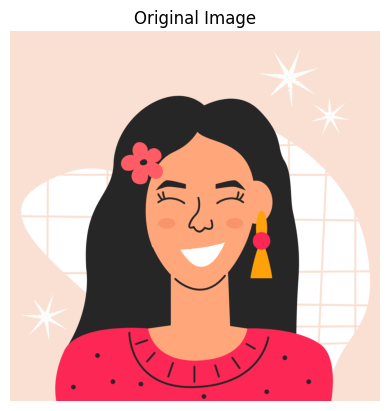

In [5]:
image = Image.open("/Users/muskansingh/machine learning algorithms/Unsupervised-Learning/k-means/image.png")
image = np.array(image)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [6]:
pixels = image.reshape(-1, 3) #flatten the image

In [7]:
#Elbow + Silhouette

inertia_values = []
silhouette_scores = []
K_range = range(2, 11)  # silhouette not valid for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(pixels, labels, sample_size=10000, random_state=42)  # sample speeds up
    )

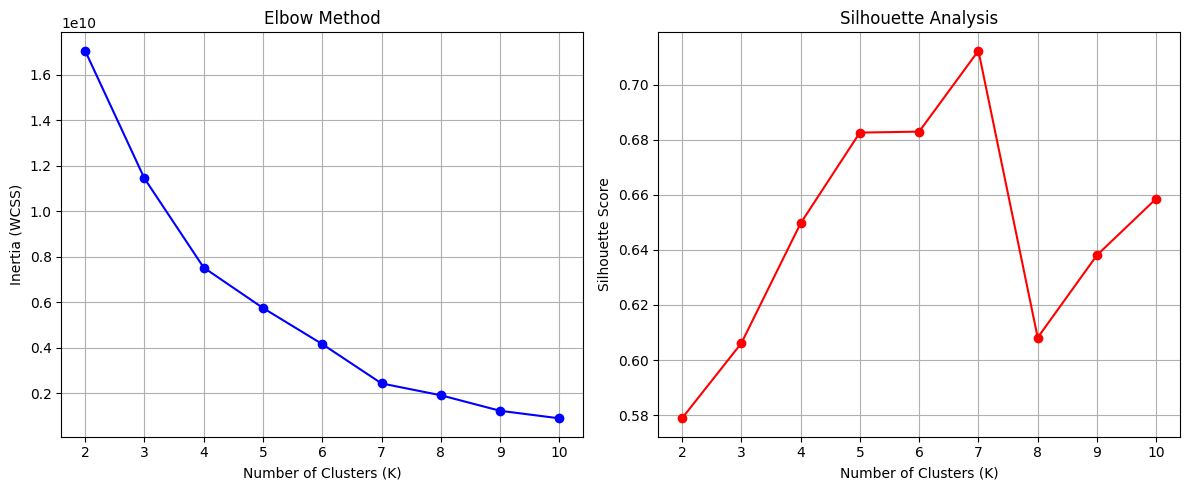

In [8]:
# Plot Elbow and Silhouette curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
#Pick Optimal K

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal K (Silhouette): {optimal_k}")

Optimal K (Silhouette): 7


In [10]:
#Segment Image

kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_opt.fit_predict(pixels)
segmented_img = kmeans_opt.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)


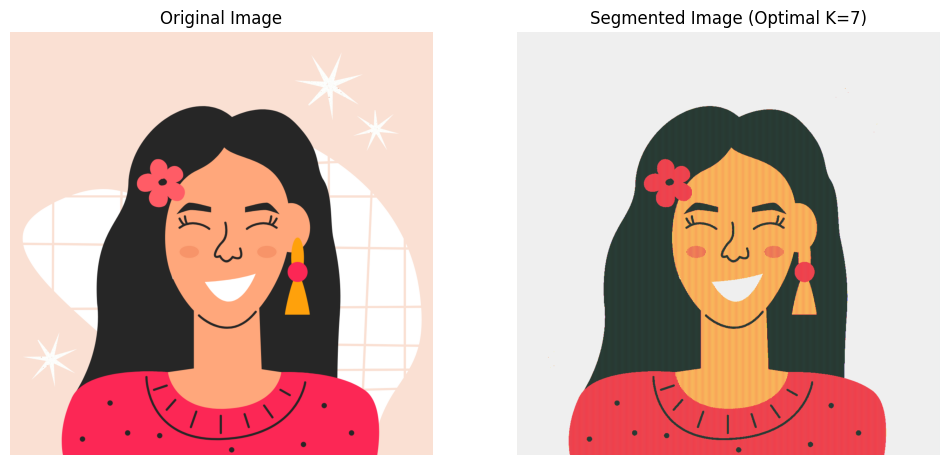

In [11]:
#Show Results

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(segmented_img)
axes[1].set_title(f"Segmented Image (Optimal K={optimal_k})")
axes[1].axis("off")

plt.show()
